# Autoencoders en Machine Learning - Parte I

Los autoencoders son un tipo de modelo de aprendizaje automático que utiliza **aprendizaje no supervisado** para aprender representaciones codificadas de los datos.

Un autoencoder aprende a **comprimir los datos** en una representación de menor dimensión y **luego los reconstruye** de vuelta a su forma original o una forma aproximada.

**Según Federico:**

Los autoencoders buscan aprender una función que comprime los datos que recibe, reduciéndolos a una representación codificada de dimensión mucho menor, y luego los reconstruye de vuelta a su forma original a una aproximación cercana.

Es como tener un dibujo en un lienzo gigante y querer guardarlo en tu bolsillo. El autoencoder verá el dibujo, tomará los puntos más importantes y hará una versión "en miniatura" de ese dibujo. Después, cuando se desee volver a ver el dibujo a tamaño real, el autoencoder puede volver a recrearlos con alta precisión a partir de una fórmula que ha utilizado para comprimirlo y descomprimirlo.

Para trabajar con autoencoders, se requiere instalar `tensorflow` (ya que no viene con Anaconda).

In [1]:
# Instalar TensorFlow
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 0.7/385.2 MB 7.4 MB/s eta 0:00:52
   ---------------------------------------- 1.3/385.2 MB 9.4 MB/s eta 0:00:41
   ---------------------------------------- 2.8/385.2 MB 14.7 MB/s eta 0:00:27
   ---------------------------------------- 4.1/385.2 MB 17.6 MB/s eta 0:00:22
    --------------------------------------- 5.7/385.2 MB 20.2 MB/s eta 0:00:19
    --------------------------------------- 6.5/385.2 MB 20.8 MB/s eta 0:00:19
    --------------------------------------- 7.0/385.2 MB 19.5 MB/s eta 0:00:20
    --------------------------------------- 8.5/385.2 MB 20.0

In [2]:
# Checar instalación
import tensorflow as tf
print(tf.__version__)

2.17.0


Esto es sólo una vez (no es necesario reinstalar).

Ahora sí, volvamos a los autoencoders.

In [1]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

El conjunto de datos `digits` incluye **imágenes de 8x8 píxeles de dígitos escritos a mano**, utilizadas para entrenar y probar los autoencoders.

Para mayor información, revisar la documentación [aquí](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html).

In [3]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Cada índice en la clave `data` es una array que contiene 64 elementos. Cada elemento representa un bit en un mapa de bits o matriz de bits (imagen raster) de resolución 8x8 bits, y su valor representa el nivel de claridad. Es decir, son pequeñas imágenes monocromáticas.

Representándolo visualmente...

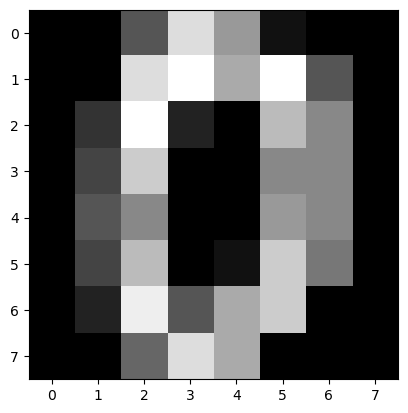

In [4]:
plt.imshow(digits['data'][0].reshape(8,8), cmap='gray')
plt.show()

`plt.imshow` nos permite representar el array en cuestión como mapa de bits.

En este caso, se observa una representación del número `0`.

Veamos otro ejemplo...

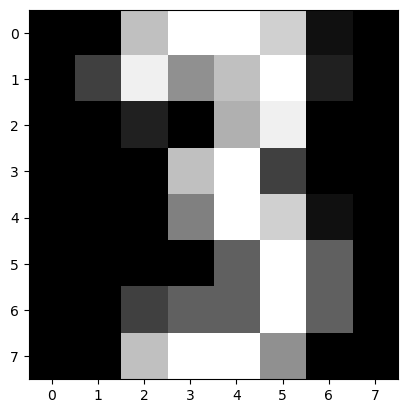

In [5]:
plt.imshow(digits['data'][345].reshape(8,8), cmap='gray')
plt.show()

No obstante, `digits` incluye una función para revisar las distintas imágenes de una manera más simple.

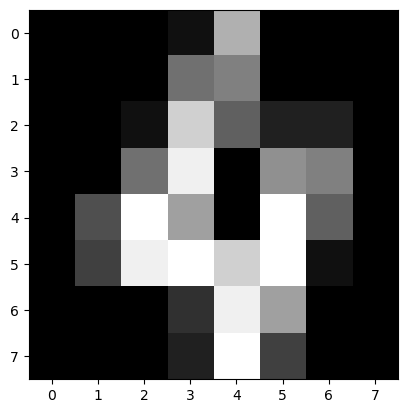

In [6]:
plt.imshow(digits.images[4], cmap='gray')
plt.show()

#### ¿Cómo aplicar los autoencoders en este caso?

In [7]:
# Declarar x que contenga todas las imágenes
x = digits.data

In [8]:
# Normalizar los datos a un rango de 0 a 1
x = x / 16.0

**NOTA DE FEDERICO:** Típicamente, los números de dígitos tienen valores en el rango de 0 a 16 para cada píxel.

In [9]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((1437, 64), (360, 64))

In [10]:
# Construir el autoencoder
input_image = Input(shape=(64,))

**NOTA DE FEDERICO:**

Con `input_image`, estamos instanciando una nueva capa de entrada que llamamos "capa tensorial". Básicamente, es la forma específica que el modelo va a esperar que tenga nuestros datos, y en `shape=(64,)` le estamos diciendo que nuestros arrays de 8x8 van a ser pasados de manera "aplanada" en un solo array 1D. Este es nuestro punto de partida para construir un modelo de **red neuronal**.

Es decir, todo esto tiene que ver con la **necesidad del modelo** de **cómo va a ver los datos**: nosotros (humanos) preferimos verlos en un mapa de bits de 8x8, pero para el modelo va a ser más fácil verlos en una sola línea.

In [11]:
encoded = Dense(32, activation='relu')(input_image)

**NOTA DE FEDERICO:**

En `encode` se genera una **red neuronal**, o más específicamente, una "capa densa", es decir, una capa con muchísimos puntos o nodos de información (de ahí lo "denso"), y que todos esos nodos van a estar conectados entre sí, como una red de neuronas, donde cada neurona tiene una conexión directa con cada una de las demás neuronas.

El primer parámetro que nos pide `Dense` es el número de nodos (o "neuronas"). Federico ha escogido `32` solamente para el caso: no hay un valor fijo o estándar, solo ha estimado la mitad de la cantidad total de pixeles que tiene la imagen.

El número a usar en otros casos va a depender de muchos otros factores, de objetos específicos del modelo y del conjunto de datos con los que se esté trabajando, y todo ello puede influir en la capacidad del modelo para aprender patrones complejos de los datos. Por ejemplo:

- Si tenemos un **número elevado de nodos**, puede aumentar la capacidad del modelo para **aprender detalles finos** de los datos de entrenamiento (útil para un dataset muy complejo y variado), pero también aumenta el riesgo de que el modelo aprenda "tanto" que **aprende incluso el "ruido"** de los datos de entrenamiento en lugar de las relaciones importantes generales, perjudicando su rendimiento en datos nuevos.

- Si tenemos un **número muy bajo de nodos**, el modelo no podría tener la capacidad suficiente para aprender adecuadamente los patrones de interés en los datos, generando un modelo demasiado simple, **incapaz de capturar la estructura subyacente** de los datos.

De ahí que el valor de `32` sea un compromiso entre ambos extremos, para tener una capacidad de aprendizaje razonable en función de las características de los datos de entrada, en este caso en particular.

El segundo parámetro, `activation`, especifica la función de activación que se va a utilizar para esta "capa densa". Federico ha declarado el valor `'relu'` (que refiere a ["Rectified Linear Unit"](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))), que es una de las funciones de activación más comunes en las redes neuronales por su simplicidad y eficacia.

El tercer parámetro (que está en sus propios paréntesis) corresponde a los datos de entrada. Es decir, la "capa densa" debe aplicarse a los datos de entrada que hemos definido en `input_image`.

**NOTA PERSONAL:** Para entender esto más gráficamente:

![flatten-and-dense-layers-computer-vision-with-keras-p-6-dense-layer-scheme-1024x723.jpg](https://pysource.com/wp-content/uploads/2022/08/flatten-and-dense-layers-computer-vision-with-keras-p-6-dense-layer-scheme-1024x723.jpg)

En la "capa densa", cada nodo recibe los datos de entrada y cada nodo va modificando un poco dichos datos en función de sus propias reglas internas antes de pasarlos al siguiente. Es decir, la red de una "capa densa" es como un grupo de personas trabajando juntas procesando "mensajes", en donde cada persona puede "pensar" el mensaje y contribuir un poco en el procesamiento de esos mensajes de manera diferente, de acuerdo a sus propias características (su propio "peso"), transformando el mensaje y llevándolo a la salida de la capa, donde se combinan todos los "puntos de vista".

In [12]:
# Construir el decodificador
decoded = Dense(64, activation='sigmoid')(encoded)

La variable `decoded` es también una "capa densa" como `encoded`, pero sus parámetros poseen otros valores:

1. Se ha escogido `64` nodos, pues suele ser la misma cantidad de puntos de entrada (en este caso, los 64 pixeles de la imagen original).
2. La función de activación `'sigmoid'` convierte los valores de entrada a la capa en valores entre 0 y 1, ya que los datos de entrada también estaban normalizados afín.

# Autoencoders en Machine Learning - Parte II

En este punto, es donde llamamos al protagonista de esta lección...

In [13]:
autoencoder = Model(input_image, decoded)

Preparemos a nuestro `autoencoder` para el entrenamiento, especificando cómo se debería actualizar durante el aprendizaje y cómo se va a medir su rendimiento.

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**NOTAS DE FEDERICO:**

El optimizador (parámetro `optimizer`) es el que ajusta los pesos del modelo. Concretamente, `'adam'` es uno de los optimizadores más populares y más efectivos, porque ajusta la tasa de aprendizaje automáticamente y funciona muy bien en la mayoría de los casos, sin demasiada configuración.

La función de pérdida (parámetro `loss`) mide qué tan bien el modelo está haciendo su trabajo (que, en este caso, es reconstruir la entrada original a partir de la versión comprimida). Concretamente, `'binary_crossentropy'` es una elección muy común cuando los datos de entrada son valores binarios, porque esta función de pérdida compara cada pixel de la imagen de entrada con el pixel correspondiente de la imagen de salida.

En resumen, con todo lo anterior, se logran minimizar las diferencias entre la imagen de entrada y la de salida.

Ya estamos listos para el entrenamiento...

In [15]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=100,      # según Federico, 100 es un punto inicial razonable
    batch_size=256,  # según Federico, 256 es un punto inicial razonable
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.6973 - val_loss: 0.6806
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6760 - val_loss: 0.6611
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6565 - val_loss: 0.6415
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6363 - val_loss: 0.6193
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6131 - val_loss: 0.5937
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5865 - val_loss: 0.5648
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5567 - val_loss: 0.5346
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5275 - val_loss: 0.5059
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4983 - val_loss: 0.4809
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4747 - val_loss: 0.4609
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.4557 - val_loss: 0.4453
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4406 - val_l

**NOTAS DE FEDERICO:**

Parámetros en la función de entrenamiento `fit()`:

- Los dos primeros `x_train` representan a los conjuntos de entrada y de salida esperados, respectivamente.

- Las épocas (`epoch`) representan el número de veces que va a repasar todo el conjunto de datos de entrenamiento

- Durante el entrenamiento, los datos suelen repartirse en lotes, que se procesan de forma independiente. El tamaño del lote (`batch_size`) indica que el modelo debería tomar, para cada lote, la cantidad de muestras asignada en ese parámetro (en este caso, `256` ejemplos de `x_train`). Todas estas muestras son tomadas **a la vez**. El modelo las procesa, ajusta sus pesos y luego repite el proceso con otro lote de la misma cantidad de muestras, etc. El objetivo es maximizar la eficiencia del entrenamiento.

- Mezcla (`shuffle`) hace que los datos se reordenen de manera aleatoria **antes de cada época**, lo que **previene que el modelo aprenda el orden específico de los datos** (algo no deseado) en lugar de las características subyacentes de los mismos (lo que sí es deseado) y, por lo tanto, la posibilidad de generalización del modelo a datos nuevos.

- En los datos de validación (`validation_data`), se coloca una tupla con los datos de prueba, en este caso, dos veces `x_test`, según lo definido en los dos primeros argumentos. El concepto habla por sí mismo. 😛 

Ahora, nuestro modelo ya ha sido entrenado!! 😎

Veamos cómo funciona, visualizando nuestros datos, en un bloque de código que tome 10 imágenes del dataset, las muestre cómo son inicialmente, las codifique, las decodifique y finalmente las vuelva a representar.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


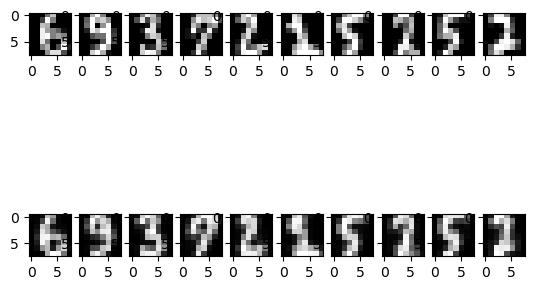

In [16]:
for i in range(10):
    # Imágenes originales
    plt.subplot(
        2,     # filas
        10,    # columnas
        i + 1  # posición de cada plot
    )
    plt.imshow(x_test[i].reshape(8,8), cmap='gray')

    # Imágenes decodificadas
    plt.subplot(
        2,
        10,
        i + 1 + 10
    )
    plt.imshow(autoencoder.predict(x_test)[i].reshape(8,8), cmap='gray')

plt.show()